# DataCleaning


- 결측치 처리가능
>> Data columns / Missing Value
- 이상치 판단 처리
>> Outlier / Duplicated Data
- 시간 데이터 및 텍스트형 데이터를 자유롭게 변환
>> Text Data / Datetime

[판다스 홈페이지](https://pandas.pydata.org/docs/reference/general_functions.html)      
[Seaborn 링크](https://seaborn.pydata.org/index.html)       
[파이썬DateTime](https://docs.python.org/ko/3/library/datetime.html)        


In [141]:
# 라이브러리 불러오기
import os
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [61]:
# 데이터 가져오기
# /Users/kwonkyoungmi/workspaces/workspace_Python/data/titanic.csv

df = pd.read_csv('/Users/kwonkyoungmi/workspaces/workspace_Python/data/titanic.csv')
data = df.copy()

## 데이터 탐색하기

- data.head()     

- data.tail()     
- data.info() ; null 값, data type 확인       
- data.describe()     
- pd.DataFrame(data) ; data frame으로 변환        
- pd.Series(<데이터프레임>)(<[컬럼이름]>) ; 데이터프레임을 시리즈로 타입으로 변환     
- np.array(data)

1.  `.describe()`	DataFrame 또는 Series 객체에 대한 요약 통계를 제공합니다. 이 메소드는 데이터의 중심 경향, 분포 및 형태 등을 빠르게 이해하는 데 도움이 됩니다.
2.	`.apply()`	함수를 데이터프레임의 열 또는 행에 적용 합니다.<예시> 데이터 프레임의 모든 수치 데이터에 2를 곱합니다.
3.	`.sort_values()`	DataFrame 또는 Series 내의 값에 따라 데이터를 정렬하는 데 사용됩니다. 데이터를 오름차순 또는 내림차순으로 정렬할 수 있으며, 복수의 열을 기준으로 정렬하는 것도 가능합니다.
4.	`.tail()`	DataFrame 또는 Series 객체의 끝에서부터 지정된 수의 행을 반환합니다. 최신 데이터셋을 확인할 때 유용한데 데이터 크기가 큰 경우에 전체 데이터를 로드하지 않고도 빠른 데이터 검토를 할 수 있도록 도와줍니다.
5.	`.replace()`	특정 값을 다른 값으로 대체 <예시> 데이터 프레임의 'A' 열에서 'apple'을 'orange'로 바꿉니다.
6.	`pd.to_numeric()`	문자열이나 다른 타입의 데이터를 숫자형(정수형 또는 부동소수점형)으로 변환하는 데 사용됩니다.
7.	`.get_dummies()`	주어진 범주형 열의 각 고유 범주를 대표하는 새로운 이진(0 또는 1) 열을 생성합니다.
8.	`Aggregation`	여러 데이터 포인트를 요약하고, 그룹화하여 새로운 통계 또는 정보를 추출하는 과정입니다. `groupby()`, 집계 함수, `std()`, `agg()`등
9.	`.merge()`	두 개 이상의 데이터 프레임을 특정 공통 열 또는 인덱스를 기준으로 병합하는 데 사용됩니다. SQL의 JOIN과 유사한 기능을 제공합니다.
10.	`.value_counts()`	범주형 데이터를 요약하는 데이터 분석 작업에 자주 사용됩니다.

In [65]:
data.head()

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,S,1,1912-03-28
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0,1912-04-03


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       882 non-null    int64  
 1   Name         882 non-null    object 
 2   Gendr        882 non-null    object 
 3   Age          876 non-null    float64
 4   SibSp        882 non-null    int64  
 5   Parch        882 non-null    int64  
 6   Ticket       882 non-null    object 
 7   Embarked     880 non-null    object 
 8   Survived     882 non-null    int64  
 9   ticket_date  882 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 75.8+ KB


In [67]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,882.000000,876.000000,882.000000,882.000000,882.000000
mean,2.311791,29.718037,0.520408,0.375283,0.377551
std,0.835681,13.542098,1.105210,0.804909,0.485049
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,145.000000,8.000000,6.000000,1.000000


## 중복데이터 제거하기 
-> 상세 함수는 아래에 후술

## Dropping Columns, Missing Values 
 불필요한 컬럼 삭제 및 누락 결측치 처리

1. 그냥 결측치가 있는 행을 다 지운다. ; data.dropna(axis = 0)

2. 평균치나, 최빈값으로 대체한다. : data[['컬럼이름']].fillna(<'값'>)       

3. 결측치가 너무 많은 컬럼이 있다면 해당 컬럼을 삭제한다. ; data.dropna(axis = 1)

- data[['컬럼이름']].isna()[.index] ; Null 값 확인      

- data.dropna()     

- data[['컬럼이름']].fillna(<'값'>) : Null 을 대체 해 '값' 넣기

.dropna() 주요 매개변수

- axis:
>    axis=0 (기본값): 결측값이 있는 행을 제거합니다.        
>    axis=1: 결측값이 있는 열을 제거합니다.

- how:
>'any' (기본값): 결측값이 하나라도 있으면 해당 행 또는 열을 제거합니다.     
>'all': 모든 값이 결측값인 경우에만 해당 행 또는 열을 제거합니다.

- thresh:
> 최소한 유효한 값의 개수를 지정합니다. 이 개수보다 적으면 해당 행 또는 열이 제거됩니다.

- subset:
> 특정 열만 고려하여 결측값을 확인합니다.

- inplace:

>True: 원본 데이터프레임을 직접 수정합니다.
>False (기본값): 수정된 데이터프레임을 반환합니다.



- 결측값을 제거하는 대신 대체하려면 data.fillna()를 사용할 수 있습니다.


In [68]:
data.drop('Name', axis = 1, inplace = True) #remove column 'Name' (기본적으로 행기준 axis=0으로 되어 있으므로 axis=1로 설정)

In [69]:
data.drop(['Pclass','Age'], axis = 1)

,Gendr,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,male,1,0,A/5 21171,S,0,1912-01-12
1,female,1,0,PC 17599,C,1,1912-03-29
2,female,0,0,STON/O2. 3101282,S,1,1912-02-23
3,female,1,0,113803,S,1,1912-03-28
4,male,0,0,373450,S,0,1912-04-03
...,...,...,...,...,...,...,...
880,male,0,0,211536,S,0,1912-01-29
881,female,0,0,112053,S,1,1912-03-30
882,female,1,2,W./C. 6607,S,0,1912-04-07
883,male,0,0,111369,C,1,1912-03-01


In [70]:
data.loc[4:]      # index 이름으로 슬라이싱
data.loc[[4,5,6]]

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
4,3,male,35.0,0,0,373450,S,0,1912-04-03
5,3,male,28.0,0,0,330877,Q,0,1912-03-30
6,1,male,54.0,0,0,17463,S,0,1912-03-14


In [71]:
data.iloc[4:]      # index 번호로 슬라이싱
data.iloc[[4,5,6]] 
data.iloc[4:10, 1:3] # 4~9행, 1~2열

,Gendr,Age
4,male,35.0
5,male,28.0
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [72]:
data.isna().sum() # 결측치 갯수 확인 (null값이면 true (1)로 변환됨)

Pclass         0
Gendr          0
Age            6
SibSp          0
Parch          0
Ticket         0
Embarked       2
Survived       0
ticket_date    0
dtype: int64

In [73]:
data.isna().mean() # 각 열의 결측치 비율 확인

Pclass         0.000000
Gendr          0.000000
Age            0.006803
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.002268
Survived       0.000000
ticket_date    0.000000
dtype: float64

In [ ]:
data[data['Age']].isna() # Age 열의 결측치 확인

In [10]:
data[data['Age'].isna()].index # Age 열의 결측치 index 확인
age_na_index = data[data['Age'].isna()].index
print(age_na_index)

Index([3, 106, 156, 185, 213, 241], dtype='int64')


In [75]:
data[data['Embarked'].isna()].index # Age 열의 결측치 index 확인
embarked_na_index = data[data['Embarked'].isna()].index
print(embarked_na_index)

Index([15, 322], dtype='int64')


In [76]:
data.loc[embarked_na_index]

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
15,2,female,55.0,0,0,248706,NaN,1,1912-03-05
322,3,male,28.0,8,2,CA. 2343,NaN,0,1912-03-26


In [77]:
data.dropna() # 결측값이 있는 행을 삭제 (axis=0이 기본값) inplace = False가 기본값이기 때문에 데이터프레임이 바뀌지 않음

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
4,3,male,35.0,0,0,373450,S,0,1912-04-03
5,3,male,28.0,0,0,330877,Q,0,1912-03-30
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [78]:
data.dropna(subset = ['Embarked']) # Embarked 열에 결측값이 있는 행을 삭제 (axis=0이 기본값) inplace = False가 기본값이기 때문에 데이터프레임이 바뀌지 않음

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,NaN,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [ ]:
data.fillna(999) # 모든 결측값을 999로 대체 (axis=0이 기본값) 

In [18]:
data['Age'].fillna(data['Age'].median()) # Age 열의 결측값을 중앙값으로 대체 (outlier 때문에 중앙값 선호)
data['Age'] = data['Age'].fillna(data['Age'].median()) 
# data['Age'].fillna(data['Age'].median(), inplace = True) # inplace = True로 설정하면 원본 데이터프레임이 바뀌나 더이상 작동 하지 않다고 하는 에러 날 수도 있음 

In [19]:
data.loc[age_na_index]

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,S,1,1912-03-28
106,3,"Moss, Mr. Albert Johan",male,28.0,0,0,312991,S,1,1912-01-27
156,3,"Corn, Mr. Harry",male,28.0,0,0,SOTON/OQ 392090,S,0,1912-04-01
185,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,28.0,1,0,370365,Q,1,1912-03-25
213,3,"Kiernan, Mr. Philip",male,28.0,1,0,367229,Q,0,1912-02-12
241,2,"Coleridge, Mr. Reginald Charles",male,28.0,0,0,W./C. 14263,S,0,1912-01-31


In [79]:
data['Embarked'].value_counts()

Embarked
S    638
C    165
Q     77
Name: count, dtype: int64

In [80]:
data['Embarked'].fillna('S') # Embarked 열의 결측값을 'S'로 대체 ; 최빈값으로 대체
# data['Embarked'] = data['Embarked'].fillna('N/A') # Embarked 열의 결측값을 'N/A'로 명시하기도 함 ; 에러방지 위해서
data['Embarked'] = data['Embarked'].fillna('S')
data.loc[embarked_na_index]


,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
15,2,female,55.0,0,0,248706,S,1,1912-03-05
322,3,male,28.0,8,2,CA. 2343,S,0,1912-03-26


## Outliers - 이상치 탐지 및 처리



주요 함수 모음 

>data.describe() # 통계량 확인      
>
>data['Age'].sort_values()  


>sns.displot(data['Age']) # Age 열의 분포 확인          
>
>sns.scatterplot(x = data.index , y = 'Age', data = data)           
>
>sns.boxplot(data['Age'])        

>data[data['Age'] <= 100] # Age가 100세 이하인 데이터만 추출    
>     
>data['Age'].apply(lambda x: 75 if x > 75 else x).sort_values() # Age 열의 75세 이상을 75으로 대체       

In [81]:
data.describe() # 통계량 확인

,Pclass,Age,SibSp,Parch,Survived
count,882.000000,876.000000,882.000000,882.000000,882.000000
mean,2.311791,29.718037,0.520408,0.375283,0.377551
std,0.835681,13.542098,1.105210,0.804909,0.485049
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,145.000000,8.000000,6.000000,1.000000


In [82]:
data['Age'].sort_values()

785    1.0
163    1.0
379    1.0
182    1.0
384    1.0
      ... 
106    NaN
156    NaN
185    NaN
213    NaN
241    NaN
Name: Age, Length: 882, dtype: float64

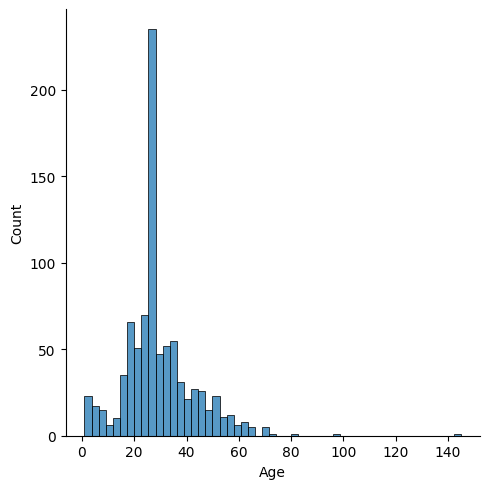

In [83]:
sns.displot(data['Age']) # Age 열의 분포 확인

<Axes: xlabel='None', ylabel='Age'>

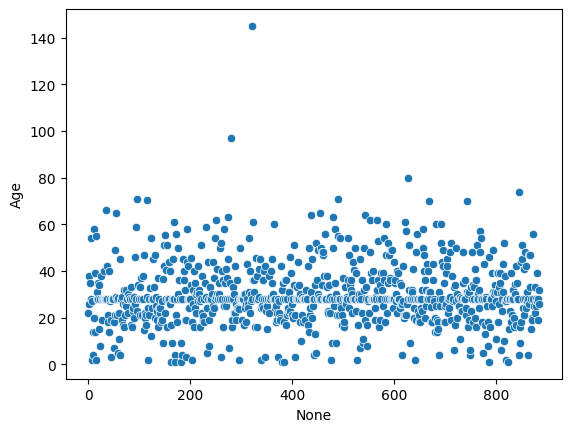

In [84]:
sns.scatterplot(x = data.index , y = 'Age', data = data)

<Axes: ylabel='Age'>

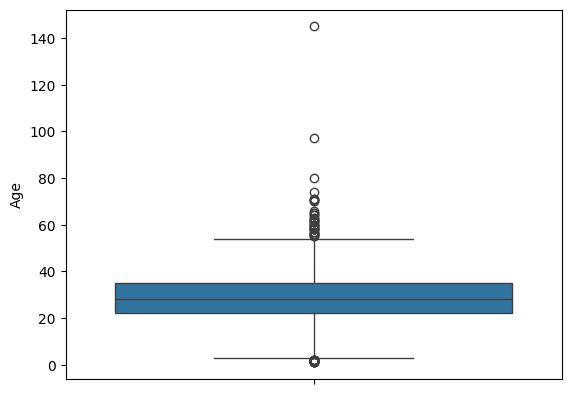

In [85]:
sns.boxplot(data['Age'])

IQR = 75% - 25%         
IQR * 1.5

In [86]:
data['SibSp'].sort_values().tail(15)

683    4
163    4
844    4
71     5
60     5
477    5
384    5
680    5
840    8
158    8
322    8
789    8
200    8
179    8
857    8
Name: SibSp, dtype: int64

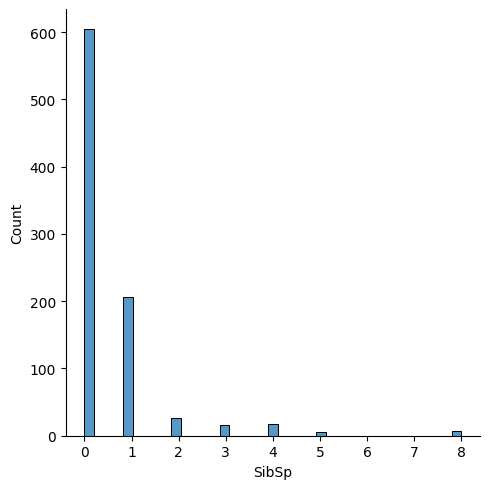

In [87]:
sns.displot(data['SibSp'])

<Axes: xlabel='None', ylabel='SibSp'>

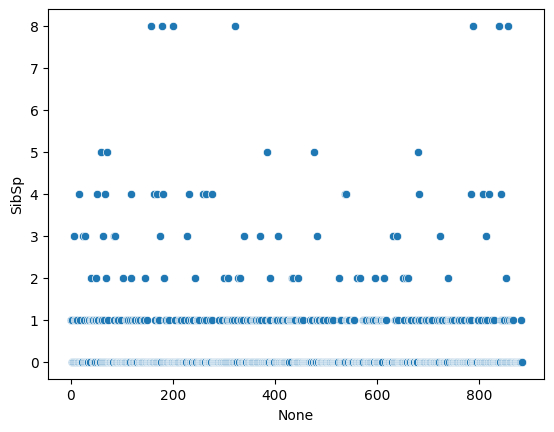

In [88]:
sns.scatterplot(x = data.index , y = 'SibSp', data = data) # Age와 Fare의 관계 확인

In [89]:
data['Age'] <= 100
data[data['Age'] <= 100] # Age가 100세 이하인 데이터만 추출
data = data[data['Age'] <= 100] # Age가 100세 이하인 데이터만 추출


In [90]:
data['Age'].sort_values().tail(15)

480    63.0
274    63.0
542    64.0
436    64.0
55     65.0
454    65.0
34     66.0
743    70.0
669    70.0
115    70.5
490    71.0
95     71.0
845    74.0
627    80.0
279    97.0
Name: Age, dtype: float64

In [91]:
def age_func(x):
    if x > 80 :
        return 80
    else:
        return x
# lambda x: 80 if x > 80 else x
# Age 열의 80세 이상을 80으로 대체

data['Age'].apply(age_func)

data['Age'].apply(age_func).sort_values().tail(15)

480    63.0
274    63.0
542    64.0
436    64.0
55     65.0
454    65.0
34     66.0
743    70.0
669    70.0
115    70.5
490    71.0
95     71.0
845    74.0
279    80.0
627    80.0
Name: Age, dtype: float64

In [92]:
data['Age'].apply(lambda x: 75 if x > 75 else x) # Age 열의 75세 이상을 75으로 대체
data['Age'].apply(lambda x: 75 if x > 75 else x).sort_values().tail(10) # Age 열의 75세 이상을 75으로 대체

454    65.0
34     66.0
743    70.0
669    70.0
115    70.5
490    71.0
95     71.0
845    74.0
279    75.0
627    75.0
Name: Age, dtype: float64

In [95]:
data.loc[:,'Age'] = data['Age'].apply(age_func)

## Removing duplicate data, apply, map, replace, rename
중복 데이터 처리 및 데이터 형태 변환처리

주요 함수 모음

data.duplicated() # 중복된 행 확인 => True/False로 반환 

data[data.duplicated()] # 중복된 행 확인    

data.drop_duplicates() # 중복된 행 삭제     

data.rename({'Gendr' : 'Gender'}, axis = 1) # 컬럼 (axis = 1) 이름 변경    

data.rename({ 0 : 'a', 1 : 'b', 2 : 'c'}) # 행 이름 변경 (index 이름 변경)      

data.replace({0: 999}) # 모든 0을 999로 변경        

data['Embarked'].replace({'S' : 'Southampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown'}) 
>>  Embarked 열의 값을 변경; Series,DataFrame        

data['Embarked'].map({'S' : 'Southampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown'}) 
>> Embarked 열의 값을 변경; replace와 유사하나, `pandas series` 에만 적용됨 
>> `.map(함수)` 사용하여 함수 적용 가능 => apply(함수)와 유사 (차이점: apply는 DataFrame에도 사용가능)





#### replace / map / apply
replace, map, apply는 모두 Pandas에서 데이터 변환 및 처리를 위해 사용되는 메서드

`replace`
>목적: 특정 값 또는 패턴을 다른 값으로 대체.        
>적용 범위: 데이터프레임 전체 또는 특정 열/시리즈.      
> 특징: 값 또는 값의 집합을 다른 값으로 대체. 정규 표현식 지원 가능(regex=True).        

`map`
>목적: 시리즈의 각 요소를 함수, 딕셔너리, 또는 시리즈를 사용해 변환.        
>적용 범위: 시리즈에만 적용 가능.       
>특징: 딕셔너리를 사용해 값 매핑 가능. 함수를 사용해 각 요소를 변환 가능.       

`apply`
>목적: 데이터프레임 또는 시리즈의 각 요소에 함수를 적용.        
>적용 범위: 시리즈 또는 데이터프레임.       
특징: (시리즈) 각 요소에 함수 적용. (데이터프레임) 행(axis=1) 또는 열(axis=0) 단위로 함수 적용.     

### 중복 데이터 처리

In [62]:
data.duplicated() # 중복된 행 확인 => True/False로 반환
data[data.duplicated()] # 중복된 행 확인

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,S,0,1912-03-14
632,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,S,0,1912-03-16
714,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,C,1,1912-03-14


In [63]:
data[data['Name'] == 'Palsson, Miss. Torborg Danira'] # 중복된 행 확인

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
24,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,S,0,1912-03-14
25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,S,0,1912-03-14


In [64]:
data.drop_duplicates() # 중복된 행 삭제
data = data.drop_duplicates() # 중복된 행 삭제

### 변경하기 (컬럼이름/인덱스이름/데이터)

In [99]:
# 컬럼 이름 변경
data.rename({'Gendr' : 'Gender'}, axis = 1) # 컬럼 이름 변경
# data.rename(columns = {'Pclass':'Passenger Class', 'SibSp':'Siblings/Spouses', 'Parch':'Parents/Children'} ) # 열 이름 변경
data = data.rename({'Gendr' : 'Gender'}, axis = 1)

In [ ]:
data.rename({ 0 : 'a', 1 : 'b', 2 : 'c'}) # 행 이름 변경 (index 이름 변경)
# data.rename({ 0 : 'a', 1 : 'b', 2 : 'c'}, axis = 0) # 행 이름 변경 (index 이름 변경)

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
a,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
b,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
c,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
4,3,male,35.0,0,0,373450,S,0,1912-04-03
5,3,male,28.0,0,0,330877,Q,0,1912-03-30
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [101]:
data['Embarked'].replace({'S' : 'Southampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown'}) # Embarked 열의 값을 변경

0      Southampton
1        Cherbourg
2      Southampton
4      Southampton
5       Queenstown
          ...     
880    Southampton
881    Southampton
882    Southampton
883      Cherbourg
884     Queenstown
Name: Embarked, Length: 875, dtype: object

In [102]:
data.replace({0: 999}) # 모든 0을 999로 변경

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,999,A/5 21171,S,999,1912-01-12
1,1,female,38.0,1,999,PC 17599,C,1,1912-03-29
2,3,female,26.0,999,999,STON/O2. 3101282,S,1,1912-02-23
4,3,male,35.0,999,999,373450,S,999,1912-04-03
5,3,male,28.0,999,999,330877,Q,999,1912-03-30
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,999,999,211536,S,999,1912-01-29
881,1,female,19.0,999,999,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,999,1912-04-07
883,1,male,26.0,999,999,111369,C,1,1912-03-01


In [103]:
data['Embarked'].map({'S' : 'Southampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown'})

0      Southampton
1        Cherbourg
2      Southampton
4      Southampton
5       Queenstown
          ...     
880    Southampton
881    Southampton
882    Southampton
883      Cherbourg
884     Queenstown
Name: Embarked, Length: 875, dtype: object

In [104]:
data['Embarked'].map(len) # Embarked 열의 길이 확인

0      1
1      1
2      1
4      1
5      1
      ..
880    1
881    1
882    1
883    1
884    1
Name: Embarked, Length: 875, dtype: int64

In [105]:
data['Embarked'].apply(len) # Embarked 열의 길이 확인

0      1
1      1
2      1
4      1
5      1
      ..
880    1
881    1
882    1
883    1
884    1
Name: Embarked, Length: 875, dtype: int64

In [106]:
data.apply(len)

Pclass         875
Gender         875
Age            875
SibSp          875
Parch          875
Ticket         875
Embarked       875
Survived       875
ticket_date    875
dtype: int64

In [108]:
len(data) # 데이터프레임의 길이 확인

875

## Text Data Handling - 텍스트 데이터 처리

Text Slicing

sample_txt[0:3] # 0~2까지 슬라이싱      
sample_txt[:3] # 0~2까지 슬라이싱       
sample_txt[4:11] # 3~끝까지 슬라이싱        
sample_txt[4:] # 3~끝까지 슬라이싱      
sample_txt[-5:] # -5부터 끝까지 슬라이싱        

Text treatment

sample_txt.lower() # 소문자로 변환      
sample_txt.upper() # 대문자로 변환      
sample_txt.title() # 첫글자만 대문자로 변환     
sample_txt.capitalize() # 첫글자만 대문자로 변환        
sample_txt.strip() # 양쪽 공백 제거     
sample_txt.lstrip() # 왼쪽 공백 제거        
sample_txt.rstrip() # 오른쪽 공백 제거      
sample_txt.split('/') # '/'로 나누기        
sample_txt.split() # 공백으로 나누기        
sample_txt.split()[1] # 공백으로 나누고 1번째 요소 출력     
sample_txt.split()[-1]

txt_a.isdigit() # 숫자인지 확인

data['Ticket'].str[-5:] # Ticket 열의 마지막 5글자 확인
data['Ticket'].str.split(expand = True) # Ticket 열을 공백으로 나누고 데이터프레임으로 변환     
data[~data['n_ticket'].str.isdigit()] # 숫자가 아닌 행 슬라이싱     
data['n_ticket'] = data['n_ticket'].replace({'LINE' : 999999}) # 'LINE'을 999999로 변경
data['n_ticket'] = data['n_ticket'].astype('int') # n_ticket 열을 int로 변경 데이터 프레임에 반영
pd.to_numeric(data['n_ticket'], errors = 'coerce') # n_ticket 열을 int로 변경 (숫자가 아닌 것은 NaN으로 변경)

In [113]:
sample_txt = 'A/5 21171'

print('sample_txt :',sample_txt)
print('sample_txt[0:3] :',sample_txt[0:3]) # 0~2까지 슬라이싱
print('sample_txt[:3] :',sample_txt[:3]) # 0~2까지 슬라이싱
print('sample_txt[4:11] :',sample_txt[4:11]) # 3~끝까지 슬라이싱
print('sample_txt[4:] :',sample_txt[4:]) # 3~끝까지 슬라이싱
print('sample_txt[-5:] :',sample_txt[-5:]) # -5부터 끝까지 슬라이싱

sample_txt : A/5 21171
sample_txt[0:3] : A/5
sample_txt[:3] : A/5
sample_txt[4:11] : 21171
sample_txt[4:] : 21171
sample_txt[-5:] : 21171


In [ ]:
print(sample_txt.lower()) # 소문자로 변환
print(sample_txt.upper()) # 대문자로 변환
print(sample_txt.title()) # 첫글자만 대문자로 변환
print(sample_txt.capitalize()) # 첫글자만 대문자로 변환
print(sample_txt.strip()) # 양쪽 공백 제거
print(sample_txt.lstrip()) # 왼쪽 공백 제거
print(sample_txt.rstrip()) # 오른쪽 공백 제거
print(sample_txt.split('/')) # '/'로 나누기
print(sample_txt.split()) # 공백으로 나누기
print(sample_txt.split()[1]) # 공백으로 나누고 1번째 요소 출력
print(sample_txt.split()[-1])

a/5 21171
A/5 21171
A/5 21171
A/5 21171
A/5 21171
A/5 21171
A/5 21171
['A', '5 21171']
['A/5', '21171']
21171
21171


In [126]:
txt_a = '123'
txt_b = 'abc'
txt_c = '12a'

In [127]:
txt_a.isdigit() # 숫자인지 확인
txt_b.isdigit() # 숫자인지 확인
txt_c.isdigit() # 숫자인지 확인

False

In [117]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
4                373450
5                330877
             ...       
880              211536
881              112053
882          W./C. 6607
883              111369
884              370376
Name: Ticket, Length: 875, dtype: object

In [118]:
# 컬럼의 값 : data['Ticket'].str
data['Ticket'].str[-5:] # Ticket 열의 마지막 5글자 확인


0      21171
1      17599
2      01282
4      73450
5      30877
       ...  
880    11536
881    12053
882     6607
883    11369
884    70376
Name: Ticket, Length: 875, dtype: object

In [119]:
data['Ticket'].str.split() # Ticket 열을 공백으로 나누기

0             [A/5, 21171]
1              [PC, 17599]
2      [STON/O2., 3101282]
4                 [373450]
5                 [330877]
              ...         
880               [211536]
881               [112053]
882          [W./C., 6607]
883               [111369]
884               [370376]
Name: Ticket, Length: 875, dtype: object

In [121]:
data['Ticket'].str.split(expand = True) # Ticket 열을 공백으로 나누고 데이터프레임으로 변환
# data['Ticket'].str.split(expand = True)[0] # Ticket 열을 공백으로 나누고 첫번째 요소 확인

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
4,373450,None,None
5,330877,None,None
...,...,...,...
880,211536,None,None
881,112053,None,None
882,W./C.,6607,None
883,111369,None,None


In [123]:
data['Ticket'].str.split().apply(lambda x : x[-1])  # Ticket 열을 공백으로 나누고 마지막 요소 확인


0        21171
1        17599
2      3101282
4       373450
5       330877
        ...   
880     211536
881     112053
882       6607
883     111369
884     370376
Name: Ticket, Length: 875, dtype: object

In [124]:
data['n_ticket'] = data['Ticket'].str.split().apply(lambda x : x[-1])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       875 non-null    int64  
 1   Gender       875 non-null    object 
 2   Age          875 non-null    float64
 3   SibSp        875 non-null    int64  
 4   Parch        875 non-null    int64  
 5   Ticket       875 non-null    object 
 6   Embarked     875 non-null    object 
 7   Survived     875 non-null    int64  
 8   ticket_date  875 non-null    object 
 9   n_ticket     875 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 107.5+ KB


In [129]:
data['n_ticket'].str.isdigit() # 숫자인지 확인

0      True
1      True
2      True
4      True
5      True
       ... 
880    True
881    True
882    True
883    True
884    True
Name: n_ticket, Length: 875, dtype: bool

In [ ]:
data['n_ticket'].str.isdigit().sum() # 숫자인거 갯수 확인

871

In [132]:
data[data['n_ticket'].str.isdigit()] # 숫자인 record 확인

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,n_ticket
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12,21171
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29,17599
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23,3101282
4,3,male,35.0,0,0,373450,S,0,1912-04-03,373450
5,3,male,28.0,0,0,330877,Q,0,1912-03-30,330877
...,...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29,211536
881,1,female,19.0,0,0,112053,S,1,1912-03-30,112053
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07,6607
883,1,male,26.0,0,0,111369,C,1,1912-03-01,111369


In [ ]:
~data['n_ticket'].str.isdigit() # 숫자 아닌 것 확인 (숫자가 아닌 것이 True)

0      False
1      False
2      False
4      False
5      False
       ...  
880    False
881    False
882    False
883    False
884    False
Name: n_ticket, Length: 875, dtype: bool

In [136]:
data[~data['n_ticket'].str.isdigit()] # 숫자가 아닌 행 슬라이싱

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,n_ticket
178,3,male,36.0,0,0,LINE,S,0,1912-04-08,LINE
270,3,male,25.0,0,0,LINE,S,1,1912-04-08,LINE
301,3,male,19.0,0,0,LINE,S,0,1912-04-08,LINE
594,3,male,49.0,0,0,LINE,S,0,1912-04-08,LINE


In [137]:
data['n_ticket'] = data['n_ticket'].replace({'LINE' : 999999}) # 'LINE'을 999999로 변경

In [ ]:
data['n_ticket'].astype('int') # n_ticket 열을 int로 변경
data['n_ticket'] = data['n_ticket'].astype('int') # n_ticket 열을 int로 변경 데이터 프레임에 반영
# pd.to_numeric(data['n_ticket'], errors = 'coerce') # n_ticket 열을 int로 변경 (숫자가 아닌 것은 NaN으로 변경)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       875 non-null    int64  
 1   Gender       875 non-null    object 
 2   Age          875 non-null    float64
 3   SibSp        875 non-null    int64  
 4   Parch        875 non-null    int64  
 5   Ticket       875 non-null    object 
 6   Embarked     875 non-null    object 
 7   Survived     875 non-null    int64  
 8   ticket_date  875 non-null    object 
 9   n_ticket     875 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 107.5+ KB


## DateTime - 날짜 및 시간 데이터 처리


>datetime.strptime('2023-10-01', '%Y-%m-%d') # 문자열을 datetime으로 변환 ;str'p'time  
>
>datetime.strftime(sample_date, '%Y-%b-%d') # datetime을 문자열로 변환 ; str'f'time      

>data['ticket_date'] = pd.to_datetime(data['ticket_date']) # 문자열을 datetime으로 변환      
>
>data['ticket_date'].dt.year # n_ticket 열을 연도로 변경     
>
>data['buy_before_acc'] = data['buy_before_acc'].dt.days # 날짜 차이를 일수로 변경 => data['buy_before_acc'] 열 int로 변경       

In [140]:
data.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,n_ticket
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12,21171
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29,17599
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23,3101282
4,3,male,35.0,0,0,373450,S,0,1912-04-03,373450
5,3,male,28.0,0,0,330877,Q,0,1912-03-30,330877


In [143]:
sample_date = datetime.strptime('2023-10-01', '%Y-%m-%d') # 문자열을 datetime으로 변환

In [144]:
datetime.strptime('23-10-01', '%y-%m-%d')

datetime.datetime(2023, 10, 1, 0, 0)

In [145]:
datetime.strptime('2023-Jan-01', '%Y-%b-%d')

datetime.datetime(2023, 1, 1, 0, 0)

In [146]:
datetime.strftime(sample_date, '%Y-%b-%d') # datetime을 문자열로 변환

'2023-Oct-01'

In [147]:
sample_date.year

2023

In [149]:
next_date = datetime.strptime('2023-05-05', '%Y-%m-%d')

In [150]:
next_date - sample_date # 날짜 차이 계산

datetime.timedelta(days=-149)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       875 non-null    int64  
 1   Gender       875 non-null    object 
 2   Age          875 non-null    float64
 3   SibSp        875 non-null    int64  
 4   Parch        875 non-null    int64  
 5   Ticket       875 non-null    object 
 6   Embarked     875 non-null    object 
 7   Survived     875 non-null    int64  
 8   ticket_date  875 non-null    object 
 9   n_ticket     875 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 107.5+ KB


In [155]:
data['ticket_date'] = pd.to_datetime(data['ticket_date']) # 문자열을 datetime으로 변환

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Pclass       875 non-null    int64         
 1   Gender       875 non-null    object        
 2   Age          875 non-null    float64       
 3   SibSp        875 non-null    int64         
 4   Parch        875 non-null    int64         
 5   Ticket       875 non-null    object        
 6   Embarked     875 non-null    object        
 7   Survived     875 non-null    int64         
 8   ticket_date  875 non-null    datetime64[ns]
 9   n_ticket     875 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 107.5+ KB


In [158]:
data['ticket_date'].dt.year # n_ticket 열을 연도로 변경

0      1912
1      1912
2      1912
4      1912
5      1912
       ... 
880    1912
881    1912
882    1912
883    1912
884    1912
Name: ticket_date, Length: 875, dtype: int32

In [159]:
acc = datetime.strptime('1912-04-15', '%Y-%m-%d')

In [ ]:
data['buy_before_acc'] = acc - data['ticket_date'] # 사고 전 구매한 날짜 계산
# data['buy_before_acc'] = data['buy_before_acc'].dt.days # 날짜 차이를 일수로 변경

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 884
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Pclass          875 non-null    int64          
 1   Gender          875 non-null    object         
 2   Age             875 non-null    float64        
 3   SibSp           875 non-null    int64          
 4   Parch           875 non-null    int64          
 5   Ticket          875 non-null    object         
 6   Embarked        875 non-null    object         
 7   Survived        875 non-null    int64          
 8   ticket_date     875 non-null    datetime64[ns] 
 9   n_ticket        875 non-null    int64          
 10  buy_before_acc  875 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(3), timedelta64[ns](1)
memory usage: 114.3+ KB


In [163]:
data.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,n_ticket,buy_before_acc
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12,21171,94 days
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29,17599,17 days
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23,3101282,52 days
4,3,male,35.0,0,0,373450,S,0,1912-04-03,373450,12 days
5,3,male,28.0,0,0,330877,Q,0,1912-03-30,330877,16 days


In [ ]:
data['buy_before_acc'] = data['buy_before_acc'].dt.days # 날짜 차이를 일수로 변경 => data['buy_before_acc'] 열이 int로 변경됨

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 884
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Pclass          875 non-null    int64         
 1   Gender          875 non-null    object        
 2   Age             875 non-null    float64       
 3   SibSp           875 non-null    int64         
 4   Parch           875 non-null    int64         
 5   Ticket          875 non-null    object        
 6   Embarked        875 non-null    object        
 7   Survived        875 non-null    int64         
 8   ticket_date     875 non-null    datetime64[ns]
 9   n_ticket        875 non-null    int64         
 10  buy_before_acc  875 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 114.3+ KB


In [166]:
data['buy_before_acc'] + 10 # 10일 더하기

0      104
1       27
2       62
4       22
5       26
      ... 
880     87
881     26
882     18
883     55
884     51
Name: buy_before_acc, Length: 875, dtype: int64